In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import os
import pickle
import random

from scipy.stats import ttest_ind

plt.rcParams['font.size'] = 18
plt.rc('font', size=18)
plt.rc('legend', fontsize=14)

In [7]:
root_dir = "/home/arash/catkin_ws/src/feedback_controller/fbc/neural_network/results/"
root_dir += "trajs:360_blocks:3_triangle_v_7.541K/ep:1000/on_v_custl_mse_1e-05_True"

file_path = os.path.join(root_dir, "perf.csv")
df = pd.read_csv(file_path)  

In [ ]:
df.head()

In [9]:
df['train_round'] = df.groupby('eps_num').cumcount() + 1

In [ ]:
df.head(10)

In [11]:
round_means = df.groupby('train_round')[['dnfc_succ', 'basel_succ',
                                         'dnfc_dtw', 'basel_dtw']].mean()

In [ ]:
round_means

In [ ]:
round_means['dnfc_succ'].tolist()

In [ ]:
overall_mean = round_means.mean()
overall_std = round_means.std()
print(overall_mean)
print("---")
print(overall_std)

In [ ]:
overall_mean['dnfc_succ']

In [2]:
stats_model = {
    'size': 0,
    'succ_mean': [],
    'succ_std': [],
    'dtw_mean': [],
    'dtw_std': [],

    'succ_arr' : [],
    'dtw_arr' : [],
}

stats_base = {
    'size': 0,
    'succ_mean': [],
    'succ_std': [],
    'dtw_mean': [],
    'dtw_std': [],

    'succ_arr' : [],
    'dtw_arr' : [],
}

stats_abl = {
    'size': 0,
    'succ_mean': [],
    'succ_std': [],
    'dtw_mean': [],
    'dtw_std': [],

    'succ_arr' : [],
    'dtw_arr' : [],
}

In [3]:
root_dir = "/home/arash/catkin_ws/src/feedback_controller/fbc/neural_network/results/"
model_params_list = [7.541, 25.301]

for num_params in model_params_list:
    model_dir = os.path.join(root_dir, f"trajs:360_blocks:3_triangle_v_{num_params}K/ep:1000/")
    for is_not_abl in [True, False]:
        file_dir = os.path.join(model_dir, f"on_v_custl_mse_1e-05_{is_not_abl}")
        file_path = os.path.join(file_dir, "perf.csv")
        df = pd.read_csv(file_path)  

        df['train_round'] = df.groupby('eps_num').cumcount() + 1
        round_means = df.groupby('train_round')[['dnfc_succ', 'basel_succ',
                                            'dnfc_dtw', 'basel_dtw']].mean()
        overall_mean = round_means.mean()
        overall_std = round_means.std()

        if is_not_abl:
            stats_model['succ_mean'].append(overall_mean['dnfc_succ'] * 100.0)
            stats_base['succ_mean'].append(overall_mean['basel_succ'] * 100.0)
            stats_model['dtw_mean'].append(overall_mean['dnfc_dtw'])
            stats_base['dtw_mean'].append(overall_mean['basel_dtw'])

            stats_model['succ_arr'].append(round_means['dnfc_succ'].tolist())
            stats_model['dtw_arr'].append(round_means['dnfc_dtw'].tolist())

            stats_model['succ_std'].append(overall_std['dnfc_succ'] * 100.0)
            stats_base['succ_std'].append(overall_std['basel_succ'] * 100.0)
            stats_model['dtw_std'].append(overall_std['dnfc_dtw'])
            stats_base['dtw_std'].append(overall_std['basel_dtw'])

            stats_base['succ_arr'].append(round_means['basel_succ'].tolist())
            stats_base['dtw_arr'].append(round_means['basel_dtw'].tolist())
        else:
            stats_abl['succ_mean'].append(overall_mean['dnfc_succ'] * 100.0)
            stats_abl['succ_std'].append(overall_std['dnfc_succ'] * 100.0)
            stats_abl['dtw_mean'].append(overall_mean['dnfc_dtw'])
            stats_abl['dtw_std'].append(overall_std['dnfc_dtw'])

            stats_abl['succ_arr'].append(round_means['dnfc_succ'].tolist())
            stats_abl['dtw_arr'].append(round_means['dnfc_dtw'].tolist())

In [4]:
stats_model

{'size': 0,
 'succ_mean': [97.77777777777779, 100.0],
 'succ_std': [3.0920328973462743, 0.0],
 'dtw_mean': [11.822987199412651, 8.846052188148589],
 'dtw_std': [2.8201747600194103, 0.4670660794771355],
 'succ_arr': [[0.9895833333333334,
   0.9930555555555556,
   0.9236111111111112,
   0.9826388888888888,
   1.0],
  [1.0, 1.0, 1.0, 1.0, 1.0]],
 'dtw_arr': [[9.49199705014312,
   12.235966638676791,
   16.530879696567325,
   10.705087509503379,
   10.151005102172638],
  [8.656718334114382,
   8.335032594886718,
   9.364348482356291,
   9.318139228269452,
   8.5560223011161]]}

In [5]:
stats_base

{'size': 0,
 'succ_mean': [77.84722222222223, 100.0],
 'succ_std': [25.51599065921188, 0.0],
 'dtw_mean': [34.18604442999413, 8.604433817308388],
 'dtw_std': [35.24135265667852, 1.4023019388378102],
 'succ_arr': [[0.7569444444444444,
   0.3541666666666667,
   0.9583333333333334,
   0.8333333333333334,
   0.9895833333333334],
  [1.0, 1.0, 1.0, 1.0, 1.0]],
 'dtw_arr': [[29.70962121262822,
   96.0227437115244,
   13.061956534262567,
   19.32665020296945,
   12.809250488586015],
  [8.554986091480956,
   7.711018314196703,
   7.645261167138508,
   11.027912988328836,
   8.082990525396943]]}

In [6]:
stats_abl

{'size': 0,
 'succ_mean': [86.45833333333333, 100.0],
 'succ_std': [12.023117842486656, 0.0],
 'dtw_mean': [23.544503119599447, 8.531183092215468],
 'dtw_std': [11.417332034776264, 1.2992468352140811],
 'succ_arr': [[0.9513888888888888, 0.9027777777777778, 0.65625, 0.9375, 0.875],
  [1.0, 1.0, 1.0, 1.0, 1.0]],
 'dtw_arr': [[17.622069796820586,
   23.62058618437235,
   42.936513105578086,
   13.726317936073132,
   19.81702857515309],
  [10.784244964074922,
   8.266991442711552,
   8.253018532939139,
   7.4949271453381545,
   7.856733376013583]]}

In [15]:
for i in range(len(stats_model['succ_arr'])):
    print("succ_arr")
    statistic, pvalue = ttest_ind(stats_model['succ_arr'][i], 
                                 stats_base['succ_arr'][i], equal_var=False)
    print(statistic, pvalue)
    print("-")

    print("dtw_arr")
    statistic, pvalue = ttest_ind(stats_model['dtw_arr'][i], 
                                 stats_base['dtw_arr'][i], equal_var=False)
    print(statistic, pvalue)
    print("===")

succ_arr
1.7339095113733023 0.15591196119122386
-
dtw_arr
-1.4144169263352275 0.2292864099452781
===
succ_arr
nan nan
-
dtw_arr
0.36553489733973626 0.7300298801841902
===


Visualization

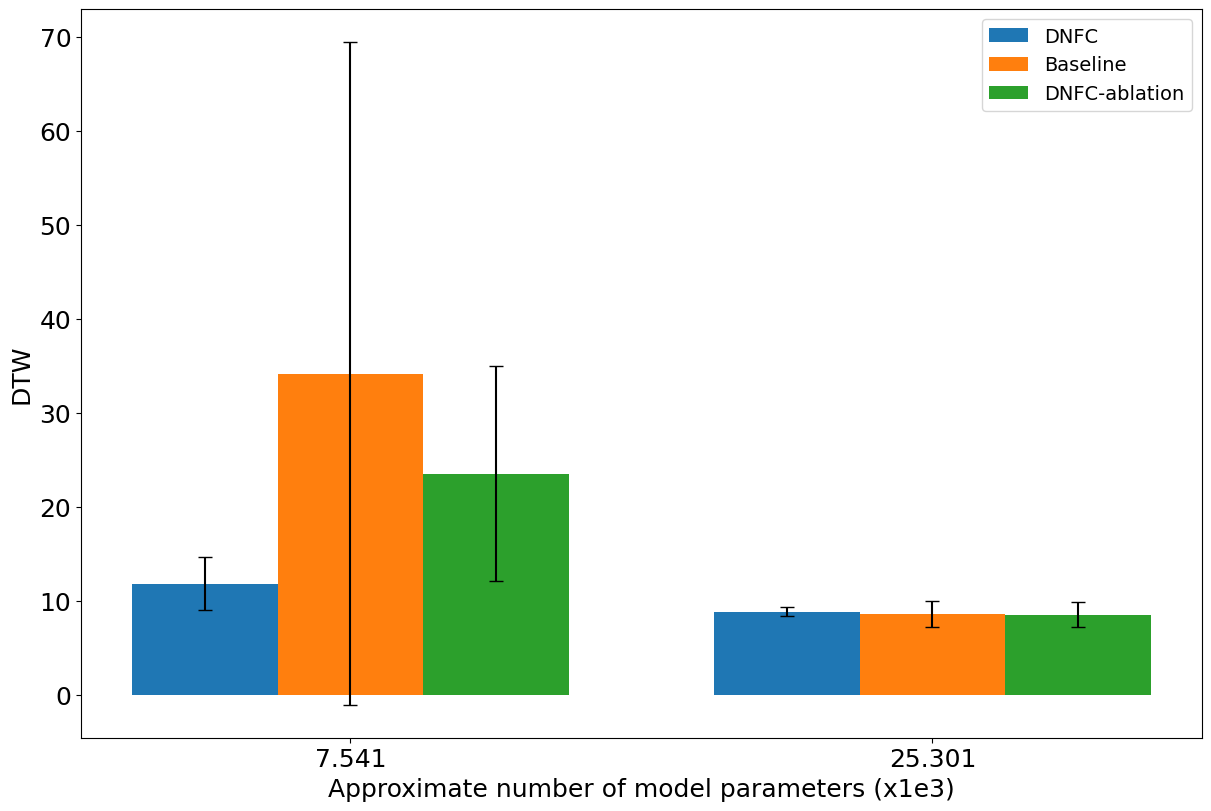

{'DNFC': [11.822987199412651, 8.846052188148589], 'Baseline': [34.18604442999413, 8.604433817308388], 'DNFC-ablation': [23.544503119599447, 8.531183092215468]}
{'DNFC': [2.8201747600194103, 0.4670660794771355], 'Baseline': [35.24135265667852, 1.4023019388378102], 'DNFC-ablation': [11.417332034776264, 1.2992468352140811]}


In [12]:
Ys = {
    'DNFC': [x for x in stats_model['dtw_mean']],
    'Baseline': [x for x in stats_base['dtw_mean']],
    'DNFC-ablation': [x for x in stats_abl['dtw_mean']],
    # 'DNFC-ablation': [x for x in stats['dist_mean_mse']],
}

errors = {
    'DNFC': [x for x in stats_model['dtw_std']],
    'Baseline': [x for x in stats_base['dtw_std']],
    'DNFC-ablation': [x for x in stats_abl['dtw_std']],
    # 'DNFC-ablation': [x for x in stats['dist_sem_mse']],
}

x = np.arange(len(model_params_list))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12, 8))

for attribute, measurement in Ys.items():
    offset = width * multiplier
    # print(attribute)
    rects = ax.bar(x + offset, measurement, width, label=attribute, yerr=errors[attribute],
                   error_kw={'capsize': 5})
    # ax.bar_label(rects, fmt='%.2f', padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('DTW')
ax.set_xlabel("Approximate number of model parameters (x1e3)")
# ax.set_title('Robot Endpoint-Target Distance')
ax.set_xticks(x + width, model_params_list)
# ax.legend(loc='upper left', ncols=3)
ax.legend()
# ax.set_ylim(0, 250)
plt.savefig(os.path.join(os.getcwd(), "paper/dtw.png"))
plt.show()
print(Ys)
print(errors)

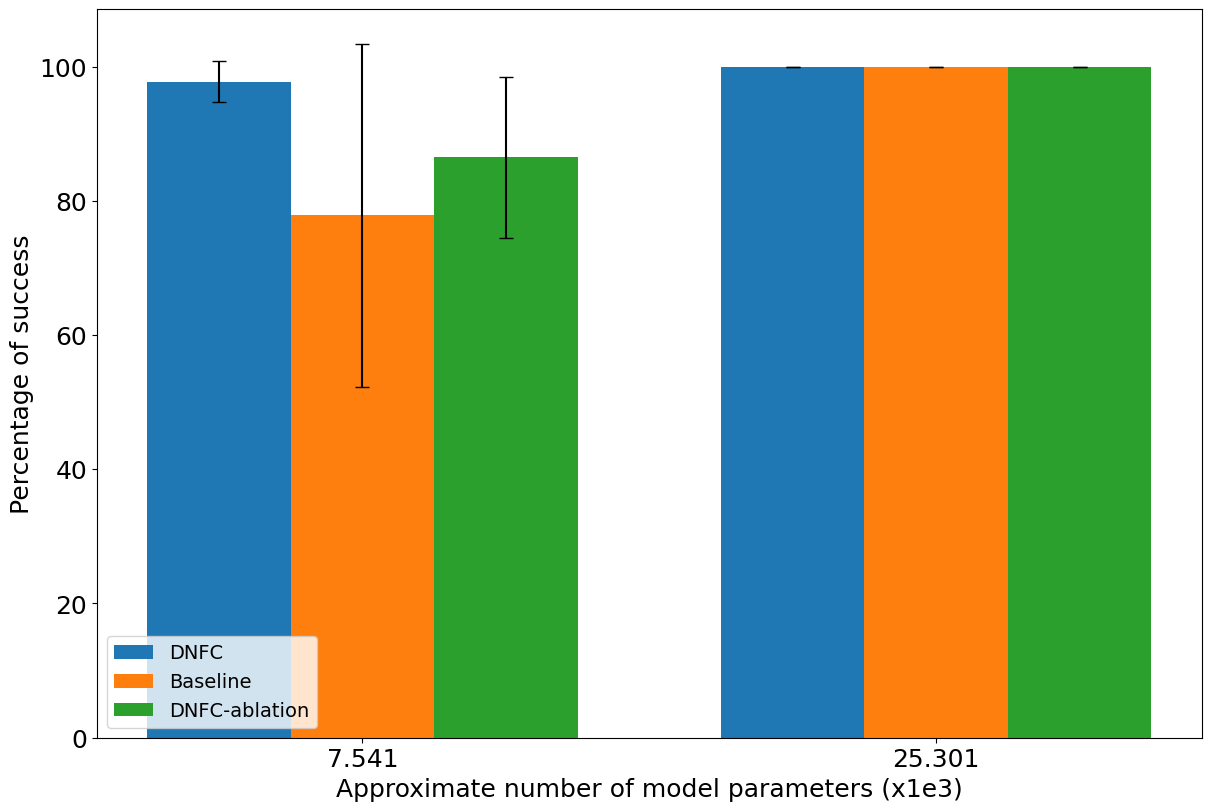

{'DNFC': [97.77777777777779, 100.0], 'Baseline': [77.84722222222223, 100.0], 'DNFC-ablation': [86.45833333333333, 100.0]}
{'DNFC': [3.0920328973462743, 0.0], 'Baseline': [25.51599065921188, 0.0], 'DNFC-ablation': [12.023117842486656, 0.0]}


In [13]:
Ys = {
    'DNFC': [x for x in stats_model['succ_mean']],
    'Baseline': [x for x in stats_base['succ_mean']],
    'DNFC-ablation': [x for x in stats_abl['succ_mean']],
    # 'DNFC-ablation': [x for x in stats['dist_mean_mse']],
}

errors = {
    'DNFC': [x for x in stats_model['succ_std']],
    'Baseline': [x for x in stats_base['succ_std']],
    'DNFC-ablation': [x for x in stats_abl['succ_std']],
    # 'DNFC-ablation': [x for x in stats['dist_sem_mse']],
}

x = np.arange(len(model_params_list))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12, 8))

for attribute, measurement in Ys.items():
    offset = width * multiplier
    # print(attribute)
    rects = ax.bar(x + offset, measurement, width, label=attribute, yerr=errors[attribute],
                   error_kw={'capsize': 5})
    # ax.bar_label(rects, fmt='%.2f', padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of success')
ax.set_xlabel("Approximate number of model parameters (x1e3)")
# ax.set_title('Robot Endpoint-Target Distance')
ax.set_xticks(x + width, model_params_list)
# ax.legend(loc='upper left', ncols=3)
ax.legend()
# ax.set_ylim(0, 250)
plt.savefig(os.path.join(os.getcwd(), "paper/succ.png"))
plt.show()
print(Ys)
print(errors)

In [ ]:
bin_no = 5

# Plot histograms for 'dnfc_succ' and 'basel_succ' side by side
plt.figure(figsize=(8, 6))
plt.hist(df["dnfc_succ"], bins=bin_no, alpha=0.7, label='dnfc_succ', edgecolor='black')
plt.hist(df["basel_succ"], bins=bin_no, alpha=0.7, label='basel_succ', edgecolor='black')
# plt.title("Histogram of dnfc_succ and basel_succ", fontsize=14)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', alpha=0.75)

file_path = os.path.join(root_dir, "succ_hist.png")
plt.savefig(file_path)
plt.show()

In [ ]:
bin_no = 10

# Plot histograms for 'dnfc_succ' and 'basel_succ' side by side
plt.figure(figsize=(8, 6))
plt.hist(df["dnfc_dtw"], bins=bin_no, alpha=0.5, label='dnfc_dtw', edgecolor='black')
plt.hist(df["basel_dtw"], bins=bin_no, alpha=0.5, label='basel_dtw', edgecolor='black')
# plt.title("Histogram of dnfc_succ and basel_succ", fontsize=14)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(axis='y', alpha=0.75)

file_path = os.path.join(root_dir, "dtw_hist.png")
plt.savefig(file_path)
plt.show()


In [2]:
root_dir = "/home/arash/catkin_ws/src/feedback_controller/fbc/neural_network/results/"
root_dir += "trajs:360_blocks:3_triangle_v_7.541K/ep:1000/on_v_custl_const_1e-05"

In [8]:
file_path = os.path.join(root_dir, "all_states_dnfc")
with open(file_path, 'rb') as f:
    all_states_dnfc = pickle.load(f)

In [ ]:
eps_no = 27

dnfc_data = all_states_dnfc[eps_no]

In [ ]:
joint_vals = [timestep_data[4] for timestep_data in dnfc_data]
timesteps = range(len(joint_vals))

plt.figure(figsize=(10, 6))
plt.plot(timesteps, joint_vals)
plt.xlabel("Timestep")
plt.ylabel("Value")
# plt.title("Fifth Value Across Timesteps")
# plt.legend()
plt.grid(True)
plt.show()

### Loss

In [2]:
root_dir = "/home/arash/catkin_ws/src/feedback_controller/fbc/neural_network/weights/"
root_dir += "trajs:360_blocks:3_triangle_v|0.8|cus_los_1e-05|tar_cart|v_custl_mse|7.541K_params/"

file_path = os.path.join(root_dir, "train_no_0/loss.csv")
df = pd.read_csv(file_path)  

In [ ]:
df.head()

In [ ]:
# Filter the dataframe for n >= 10
filtered_df = df[df["n"] >= 10]

# Plot train_loss_torques and val_loss_torques vs n
plt.figure(figsize=(8, 6))
plt.plot(filtered_df["n"], filtered_df["train_loss_torques"], marker='o', linestyle='-', label="Train Loss Torques")
plt.plot(filtered_df["n"], filtered_df["val_loss_torques"], marker='x', linestyle='-', label="Val Loss Torques")
plt.xlabel("n")
plt.ylabel("Loss")
plt.title("Train and Val Loss Torques vs n (n >= 10)")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
filtered_df